# FYP ICT3909 - Yolov12 Training
---

**Name:** Andrea Filiberto Lucas  
**ID No:** 0279704L

---

## Automated Dataset Management with Roboflow and Folder Organization

This script automates the process of managing a dataset using Roboflow. It creates necessary directories, checks for installed dependencies, installs them if missing, and downloads the dataset. It also organizes the dataset into a structured folder hierarchy, ensuring everything is ready for further use.

In [2]:
import os
import subprocess
import shutil
import importlib

# Constants for colored output
COLORS = {
    "green": "\033[92m",  # Green text
    "red": "\033[91m",    # Red text
    "reset": "\033[0m"    # Reset to default color
}

# Define the path to the Versions folder and the target subfolder
versions_path = os.path.abspath(os.path.join("..", "Other", "Versions"))
target_subfolder = os.path.join(versions_path, "NGD-Yolov12")

# Check if the Versions folder exists, if not, create it
if not os.path.exists(versions_path):
    os.makedirs(versions_path)
    print(f"[{COLORS['green']}✔{COLORS['reset']}] Folder created at: {versions_path}")

# Check if the MDD-AFL-Yolov12 subfolder exists
if os.path.exists(target_subfolder):
    print(f"[{COLORS['green']}✔{COLORS['reset']}] The subfolder '{target_subfolder}' already exists. Skipping download!")
else:
    # Check if roboflow is installed
    if importlib.util.find_spec("roboflow") is not None:                                                                                                        # type: ignore
        print(f"[{COLORS['green']}✔{COLORS['reset']}] Roboflow is already installed!")
    else:
        # Install roboflow using pip
        try:
            subprocess.check_call(["pip", "install", "roboflow"])
            print(f"[{COLORS['green']}✔{COLORS['reset']}] Roboflow successfully installed!")
        except subprocess.CalledProcessError as e:
            print(f"[{COLORS['red']}✖{COLORS['reset']}]Failed to install Roboflow. Please check your setup.")
            raise e

    # Import and use Roboflow
    from roboflow import Roboflow                                                                                                                               # type: ignore

    # Prompt the user for their API key
    print("Please enter your Roboflow API key to download the dataset...")
    api_key = input("Please enter your Roboflow API key: ")

    # Initialize Roboflow with the provided API key
    rf = Roboflow(api_key=api_key)

    # Retrieve project and version
    project = rf.workspace("ict3909-fyp").project("news-graphic-dataset")
    version = project.version(1)

    # Download the dataset
    dataset = version.download("yolov12")

    current_folder = os.getcwd()  # Get the current working directory
    original_folder = os.path.join(current_folder, "News-Graphic-Dataset-1")
    renamed_folder = os.path.join(current_folder, "NGD-Yolov12")
    target_folder = os.path.join(versions_path, "NGD-Yolov12")

    # Check if the original folder exists
    if os.path.exists(original_folder):
        # Rename the folder
        os.rename(original_folder, renamed_folder)

        # Move the renamed folder to ../Versions/
        shutil.move(renamed_folder, target_folder)
        print(f"[{COLORS['green']}✔{COLORS['reset']}] Folder downloaded to: {target_folder}")
    else:
        print(f"[{COLORS['red']}✖{COLORS['reset']}]Folder '{original_folder}' does not exist. No action taken.")


[✔] The subfolder '/Volumes/Fili's SSD/FYP/Accurate-Name-Extraction/Other/Versions/NGD-Yolov12' already exists. Skipping download!


## Automated Library Installer in Python

This script automates checking and installing libraries from a JSON file. It verifies installations, installs missing libraries via `pip`, and provides clear, colored output for success or errors. With built-in error handling and preloaded common libraries, it simplifies dependency management in Python projects.

In [3]:
import json
import importlib.util

# Path to the JSON file
lib_file_path = os.path.join("..", "Other", "Libraries", "Yolo.json")

# Read the libraries from the JSON file
try:
    with open(lib_file_path, 'r') as file:
        libraries = json.load(file)
except FileNotFoundError:
    print(f"{COLORS['red']}Error: Library file not found at {lib_file_path}{COLORS['reset']}")
    exit(1)
except json.JSONDecodeError:
    print(f"{COLORS['red']}Error: Failed to decode JSON from the library file.{COLORS['reset']}")
    exit(1)

# Function to check and install libraries
def check_and_install_libraries(libraries):
    for lib, import_name in libraries.items():
        # Check if the library is installed by checking its module spec
        if importlib.util.find_spec(import_name) is not None:
            print(f"[{COLORS['green']}✔{COLORS['reset']}] Library '{lib}' is already installed.")
        else:
            # If the library is not found, try to install it
            print(f"[{COLORS['red']}✖{COLORS['reset']}] Library '{lib}' is not installed. Installing...")
            try:
                subprocess.check_call(["pip", "install", lib])
                print(f"[{COLORS['green']}✔{COLORS['reset']}] Successfully installed '{lib}'.")
            except subprocess.CalledProcessError:
                print(f"[{COLORS['red']}✖{COLORS['reset']}] Failed to install '{lib}'. Please install it manually.")


# Execute the function to check and install libraries
check_and_install_libraries(libraries)

# Import necessary libraries 
import time
import torch                                                                                                                                                    #type: ignore
import random
import pandas as pd                                                                                                                                             #type: ignore
import cv2                                                                                                                                                      #type: ignore
import matplotlib.pyplot as plt                                                                                                                                 #type: ignore
import seaborn as sns                                                                                                                                           #type: ignore
import numpy as np                                                                                                                                              #type: ignore
import matplotlib.patches as patches                                                                                                                            #type: ignore
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm                                                                                                                                           #type: ignore
from ultralytics import YOLO                                                                                                                                    #type: ignore
from IPython.display import Image, display                                                                                                                      #type: ignore

[✔] Library 'opencv-python' is already installed.
[✔] Library 'matplotlib' is already installed.
[✔] Library 'tqdm' is already installed.
[✔] Library 'ultralytics' is already installed.
[✔] Library 'torch' is already installed.


## Determine the Available Device for Computation

This function identifies and selects the best available device for running deep learning models, prioritizing hardware acceleration via CUDA (GPU) or MPS (Metal Performance Shaders). If no hardware acceleration is available, it defaults to the CPU and notifies the user.

In [4]:
# Determine the available device: CUDA, MPS, or CPU.
def determine_device():
    if torch.cuda.is_available():
        device = "cuda"
        print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    elif torch.backends.mps.is_available():
        device = "mps"
        print("Using MPS (Metal Performance Shaders) for acceleration.")
    else:
        device = "cpu"
        print("Using CPU. Consider enabling GPU or MPS for faster training.")
    return device

## Training process for Yolov12 object detector.
### Experiment Configuration for YOLOv12

Defines the path to the `data.yaml` file and key hyperparameters for conducting experiments with YOLOv12. These settings include the number of epochs, image size, batch size, and a customizable experiment name for version tracking and organization.

In [7]:
# Path to data.yaml
data_yaml_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), "Other", "Versions", "NGD-Yolov12", "data.yaml")

# Prompt user for hyperparameters
try:
    epochs = int(input("Enter the number of epochs: "))
    experiment_number = int(input("Enter the experiment number: "))
    experiment_name = f"NGD-Yolov12_v{experiment_number}"
except ValueError:
    print("Invalid input. Please enter valid numbers for epochs and experiment number.")
    raise

# Display selected parameters
print(f"Selected epochs: {epochs}")
print(f"Experiment name: {experiment_name}")

# Hyperparameters
imgsz = 640
batch_size = 8

Selected epochs: 1
Experiment name: NGD-Yolov12_v101


In [8]:
# Timer start
start_time = time.time()

# Create or load a YOLOv12 model (from scratch)
try:
    model = YOLO("yolo12.yaml")  # specify architecture
except FileNotFoundError:
    print("Error: YOLOv12 configuration file 'yolo12.yaml' not found. Check setup!")
    raise

# Train
try:
    model.train(
        data=data_yaml_path,
        epochs=epochs,
        imgsz=imgsz,
        batch=batch_size,
        name=experiment_name,
        pretrained=False,  
        plots=True,
        device=determine_device(),
        patience=10,
        dropout=0.4,
        cos_lr=True,
        lr0=0.0001,
        lrf=0.00001,
    )
except Exception as e:
    print(f"Error during training: {e}")
    raise

# Timer end
end_time = time.time()
# Calculate elapsed time
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)
print(f"Training completed in {hours}h {minutes}m {seconds}s.")

# Evaluate
try:
    metrics = model.val()
    print("Validation Metrics:", metrics)
except Exception as e:
    print(f"Error during validation: {e}")
    raise

WARNING ⚠️ no model scale passed. Assuming scale='n'.


Using MPS (Metal Performance Shaders) for acceleration.
Ultralytics 8.3.96 🚀 Python-3.11.7 torch-2.4.1 MPS (Apple M2)
engine/trainer: task=detect, mode=train, model=yolo12.yaml, data=/Users/afl/Documents/University/Year 3/FYP/3. Code/Other/Versions/NGD-Yolov12/data.yaml, epochs=1, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=NGD-Yolov12_v1012, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /Users/afl/Documents/University/Year 3/FYP/3. Code/Other/Versions/NGD-Yolov12/train/labels... 5250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5250/5250 [00:01<00:00, 3414.32it/s]


train: New cache created: /Users/afl/Documents/University/Year 3/FYP/3. Code/Other/Versions/NGD-Yolov12/train/labels.cache


val: Scanning /Users/afl/Documents/University/Year 3/FYP/3. Code/Other/Versions/NGD-Yolov12/valid/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 3498.18it/s]

val: New cache created: /Users/afl/Documents/University/Year 3/FYP/3. Code/Other/Versions/NGD-Yolov12/valid/labels.cache
Plotting labels to runs/detect/NGD-Yolov12_v1012/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/NGD-Yolov12_v1012
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      4.92G      3.782       4.33      3.376          4        640: 100%|██████████| 657/657 [49:11<00:00,  4.49s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/19 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/19 [01:08<20:25, 68.11s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [01:45<14:11, 50.08s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 3/19 [02:20<11:30, 43.15s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 4/19 [03:05<11:00, 44.01s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▋       | 5/19 [03:39<09:23, 40.26s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 6/19 [04:03<07:31, 34.73s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  37%|███▋      | 7/19 [04:33<06:40, 33.38s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  42%|████▏     | 8/19 [04:56<05:27, 29.76s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  47%|████▋     | 9/19 [05:21<04:45, 28.56s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  53%|█████▎    | 10/19 [05:37<03:40, 24.51s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  58%|█████▊    | 11/19 [05:55<02:59, 22.43s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  63%|██████▎   | 12/19 [06:28<02:59, 25.68s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 13/19 [06:48<02:24, 24.04s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▎  | 14/19 [07:05<01:50, 22.02s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 15/19 [07:30<01:31, 22.80s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 16/19 [08:01<01:15, 25.23s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 17/19 [08:29<00:52, 26.20s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▍| 18/19 [08:54<00:25, 25.82s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [09:49<00:00, 31.02s/it]


                   all        300        943     0.0385     0.0411     0.0106    0.00387

1 epochs completed in 0.992 hours.
Optimizer stripped from runs/detect/NGD-Yolov12_v1012/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/NGD-Yolov12_v1012/weights/best.pt, 5.5MB

Validating runs/detect/NGD-Yolov12_v1012/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.7 torch-2.4.1 MPS (Apple M2)
YOLO12 summary (fused): 159 layers, 2,557,898 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/19 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/19 [00:30<09:02, 30.16s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 2/19 [00:40<05:11, 18.31s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 3/19 [00:56<04:41, 17.62s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 4/19 [01:22<05:10, 20.69s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▋       | 5/19 [01:35<04:12, 18.04s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 6/19 [01:41<03:02, 14.01s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  37%|███▋      | 7/19 [01:50<02:26, 12.17s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  42%|████▏     | 8/19 [02:00<02:06, 11.50s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  47%|████▋     | 9/19 [02:05<01:35,  9.57s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  53%|█████▎    | 10/19 [02:11<01:15,  8.34s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  58%|█████▊    | 11/19 [02:17<01:02,  7.82s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  63%|██████▎   | 12/19 [02:25<00:53,  7.68s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 13/19 [02:42<01:03, 10.66s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▎  | 14/19 [02:53<00:52, 10.59s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 15/19 [03:00<00:38,  9.52s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 16/19 [03:09<00:27,  9.30s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 17/19 [03:22<00:21, 10.56s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▍| 18/19 [03:34<00:10, 10.90s/it]

WARNING ⚠️ NMS time limit 2.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [03:50<00:00, 12.16s/it]


                   all        300        943     0.0335     0.0271     0.0053    0.00173
 Breaking News Graphic         47         48     0.0346     0.0625    0.00888    0.00276
Digital On-Screen Graphic        289        392     0.0506     0.0102     0.0109    0.00413
   Lower Third Graphic        147        156      0.051     0.0321    0.00485    0.00116
         News Headline         99        100    0.00482       0.05    0.00217    0.00112
           News Ticker        125        126     0.0603    0.00794    0.00348   0.000348
    Other News Graphic         92        121          0          0     0.0015   0.000874
Speed: 68.6ms preprocess, 313.5ms inference, 0.0ms loss, 309.4ms postprocess per image
Results saved to runs/detect/NGD-Yolov12_v1012
Training completed in 1h 4m 38s.
Ultralytics 8.3.96 🚀 Python-3.11.7 torch-2.4.1 MPS (Apple M2)
YOLO12 summary (fused): 159 layers, 2,557,898 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /Users/afl/Documents/University/Year 3/FYP/3. Code/Other/Versions/NGD-Yolov12/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/38 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/38 [00:13<08:37, 13.99s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 2/38 [00:17<04:50,  8.06s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 3/38 [00:21<03:25,  5.87s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 4/38 [00:25<02:52,  5.07s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  13%|█▎        | 5/38 [00:29<02:37,  4.78s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  16%|█▌        | 6/38 [00:35<02:44,  5.15s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 7/38 [00:39<02:31,  4.89s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 8/38 [00:44<02:25,  4.84s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  24%|██▎       | 9/38 [00:51<02:41,  5.56s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▋       | 10/38 [00:55<02:22,  5.08s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▉       | 11/38 [01:01<02:22,  5.26s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  32%|███▏      | 12/38 [01:04<02:04,  4.81s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  34%|███▍      | 13/38 [01:10<02:05,  5.01s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  37%|███▋      | 14/38 [01:17<02:16,  5.69s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  39%|███▉      | 15/38 [01:22<02:06,  5.52s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  42%|████▏     | 16/38 [01:26<01:52,  5.13s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▍     | 17/38 [01:32<01:48,  5.19s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  47%|████▋     | 18/38 [01:35<01:32,  4.61s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 19/38 [01:43<01:48,  5.73s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  53%|█████▎    | 20/38 [01:49<01:41,  5.63s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 21/38 [01:52<01:24,  4.95s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  58%|█████▊    | 22/38 [01:57<01:18,  4.93s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  61%|██████    | 23/38 [02:01<01:10,  4.72s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  63%|██████▎   | 24/38 [02:06<01:04,  4.62s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  66%|██████▌   | 25/38 [02:10<00:59,  4.60s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 26/38 [02:16<00:59,  4.97s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████   | 27/38 [02:20<00:52,  4.75s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▎  | 28/38 [02:25<00:46,  4.70s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  76%|███████▋  | 29/38 [02:32<00:48,  5.42s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 30/38 [02:35<00:38,  4.87s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  82%|████████▏ | 31/38 [02:41<00:35,  5.14s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  84%|████████▍ | 32/38 [02:45<00:28,  4.82s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 33/38 [02:51<00:25,  5.07s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 34/38 [02:58<00:22,  5.56s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  92%|█████████▏| 35/38 [03:04<00:17,  5.83s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▍| 36/38 [03:09<00:11,  5.63s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [03:25<00:00,  5.41s/it]


                   all        300        943     0.0875      0.102     0.0404      0.014
 Breaking News Graphic         47         48     0.0723      0.102     0.0426    0.00771
Digital On-Screen Graphic        289        392      0.269     0.0459     0.0433     0.0147
   Lower Third Graphic        147        156      0.083     0.0449     0.0123    0.00289
         News Headline         99        100     0.0345       0.41      0.135     0.0561
           News Ticker        125        126          0          0    0.00202   0.000202
    Other News Graphic         92        121      0.066    0.00826    0.00762    0.00245
Speed: 52.1ms preprocess, 65.1ms inference, 0.0ms loss, 358.2ms postprocess per image
Results saved to runs/detect/NGD-Yolov12_v10122
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 

## Results

### Ultralytics Results 

This script facilitates the selection and evaluation of YOLOv12 detection results stored in the `runs/detect` directory. It identifies folders ending with "R," lets the user choose one, and displays evaluation images within the selected folder (excluding "val_batch" files). Additionally, it checks the corresponding "non-R" folder for a `results.png` file and displays it if found.

Available folders:
1. NGD-Yolov12_v101R

Selected folder: NGD-Yolov12_v101R

Displaying evaluation images:


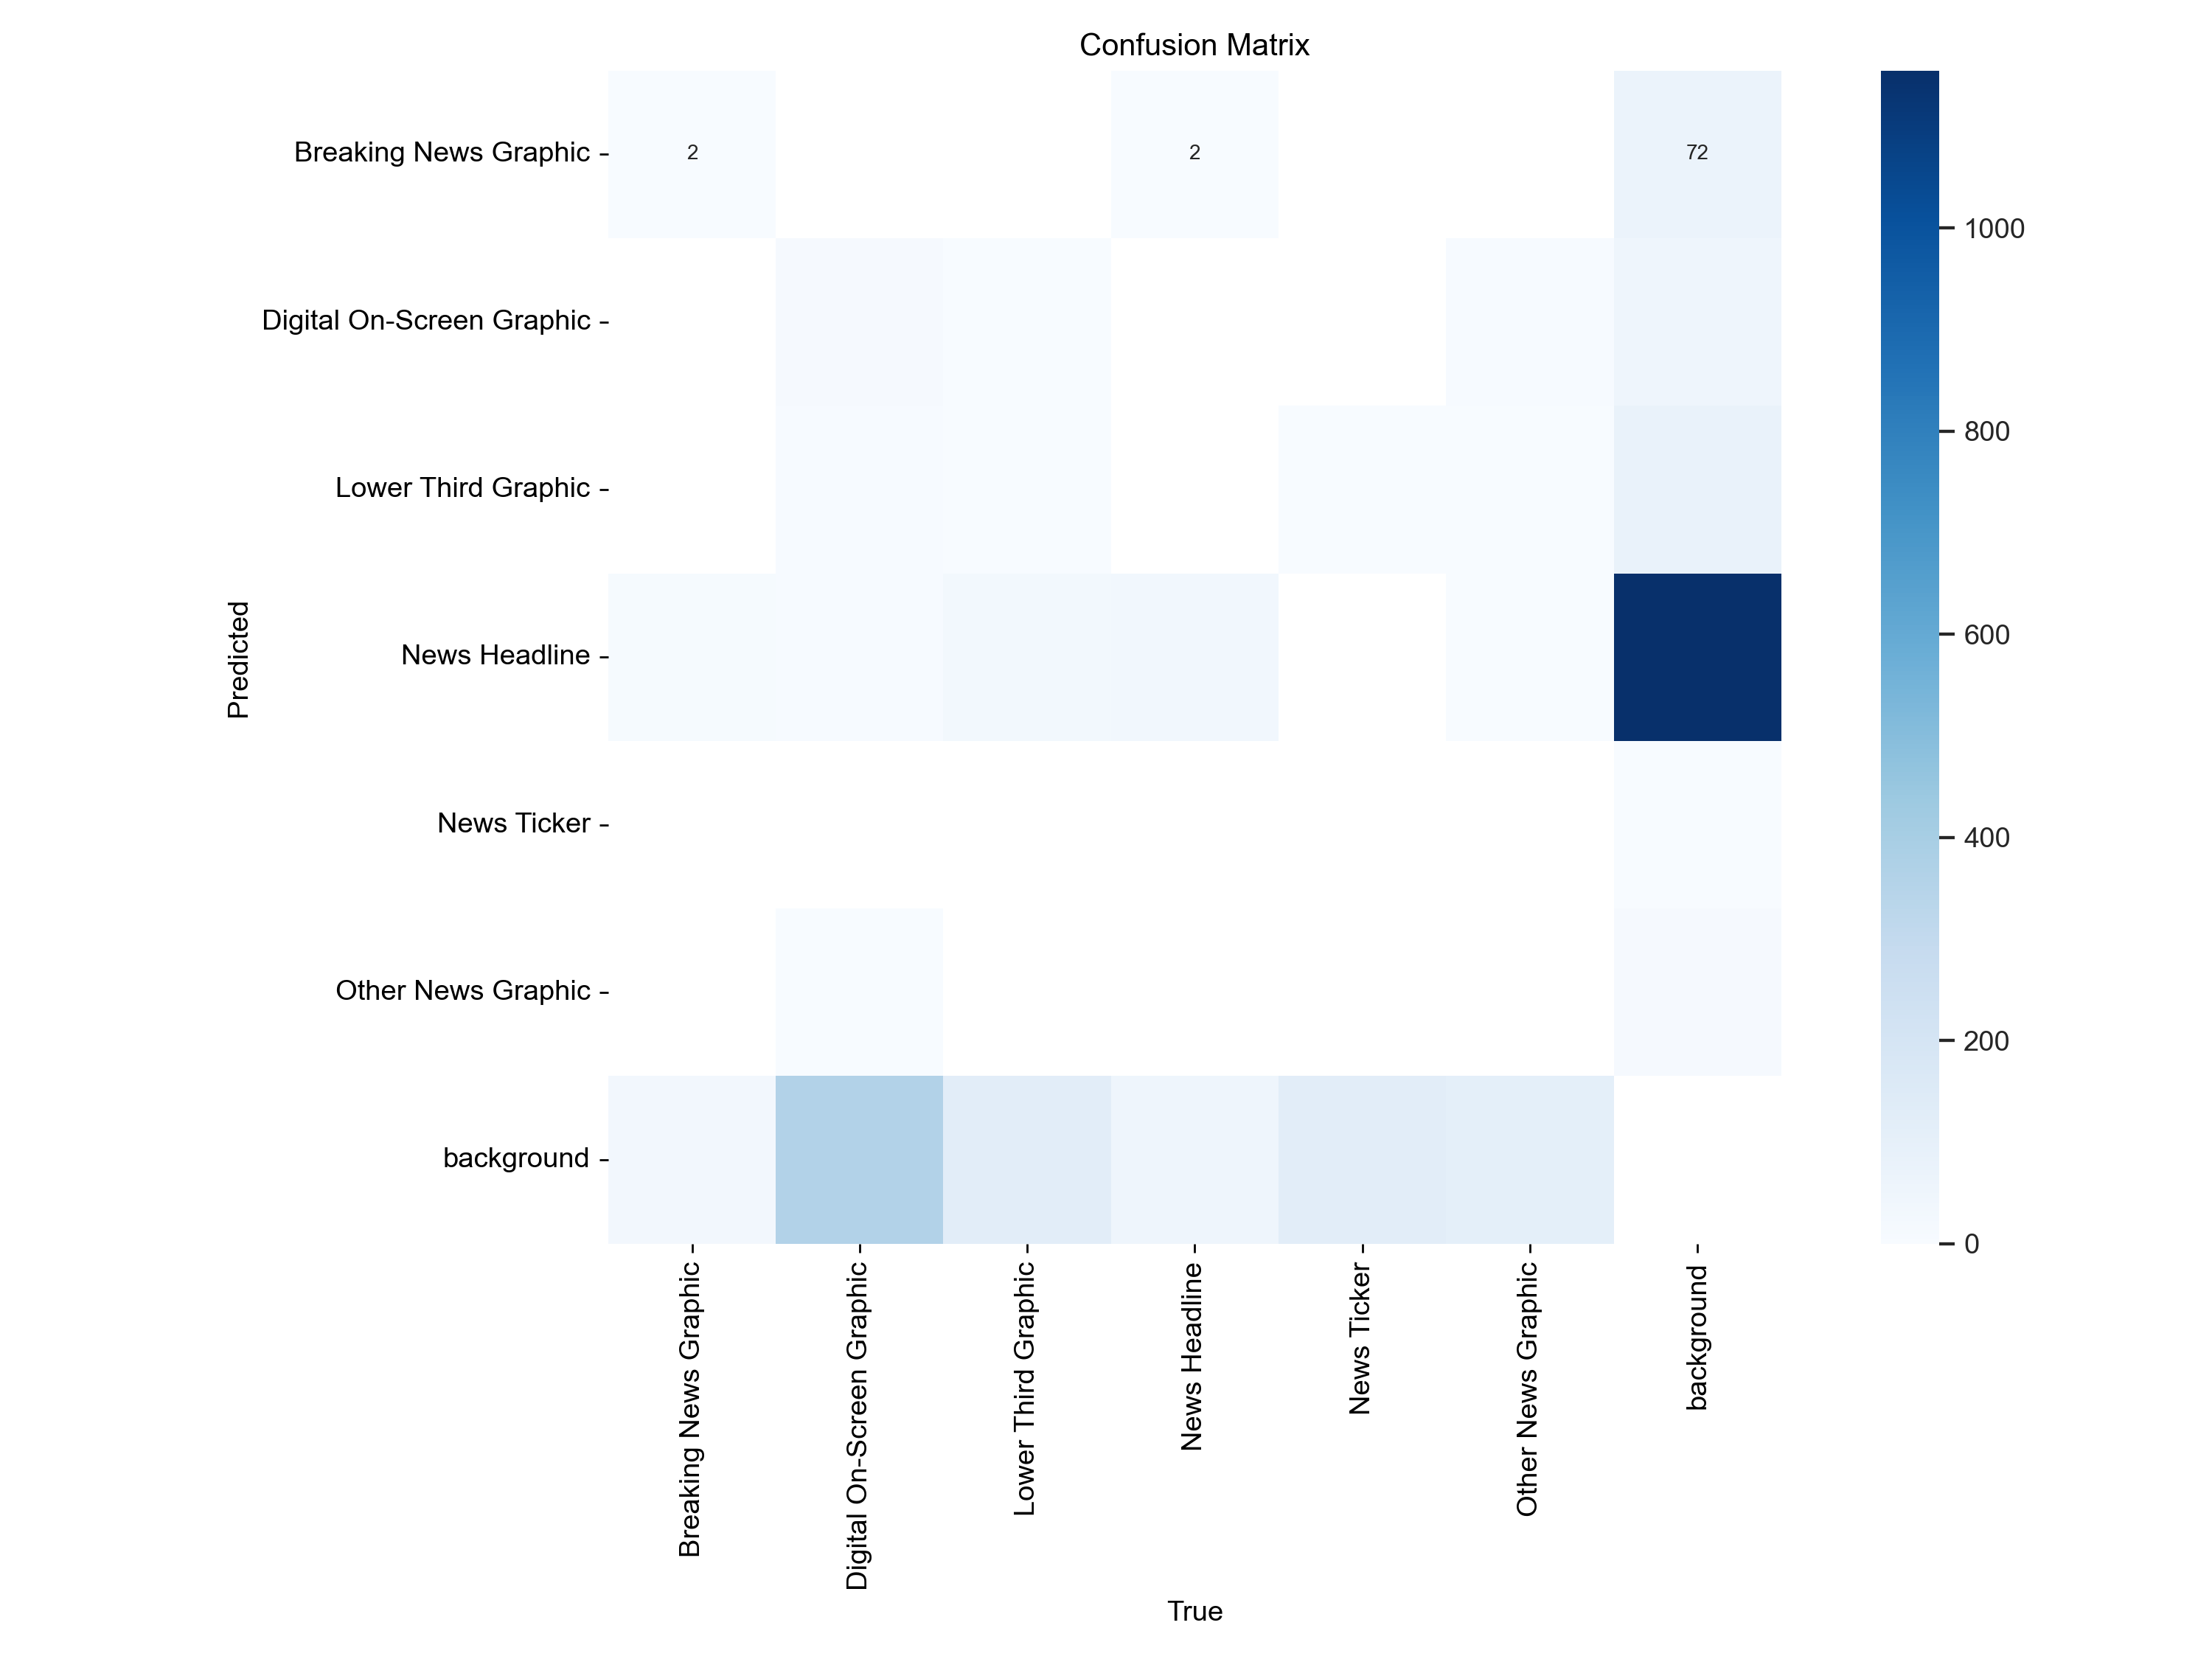

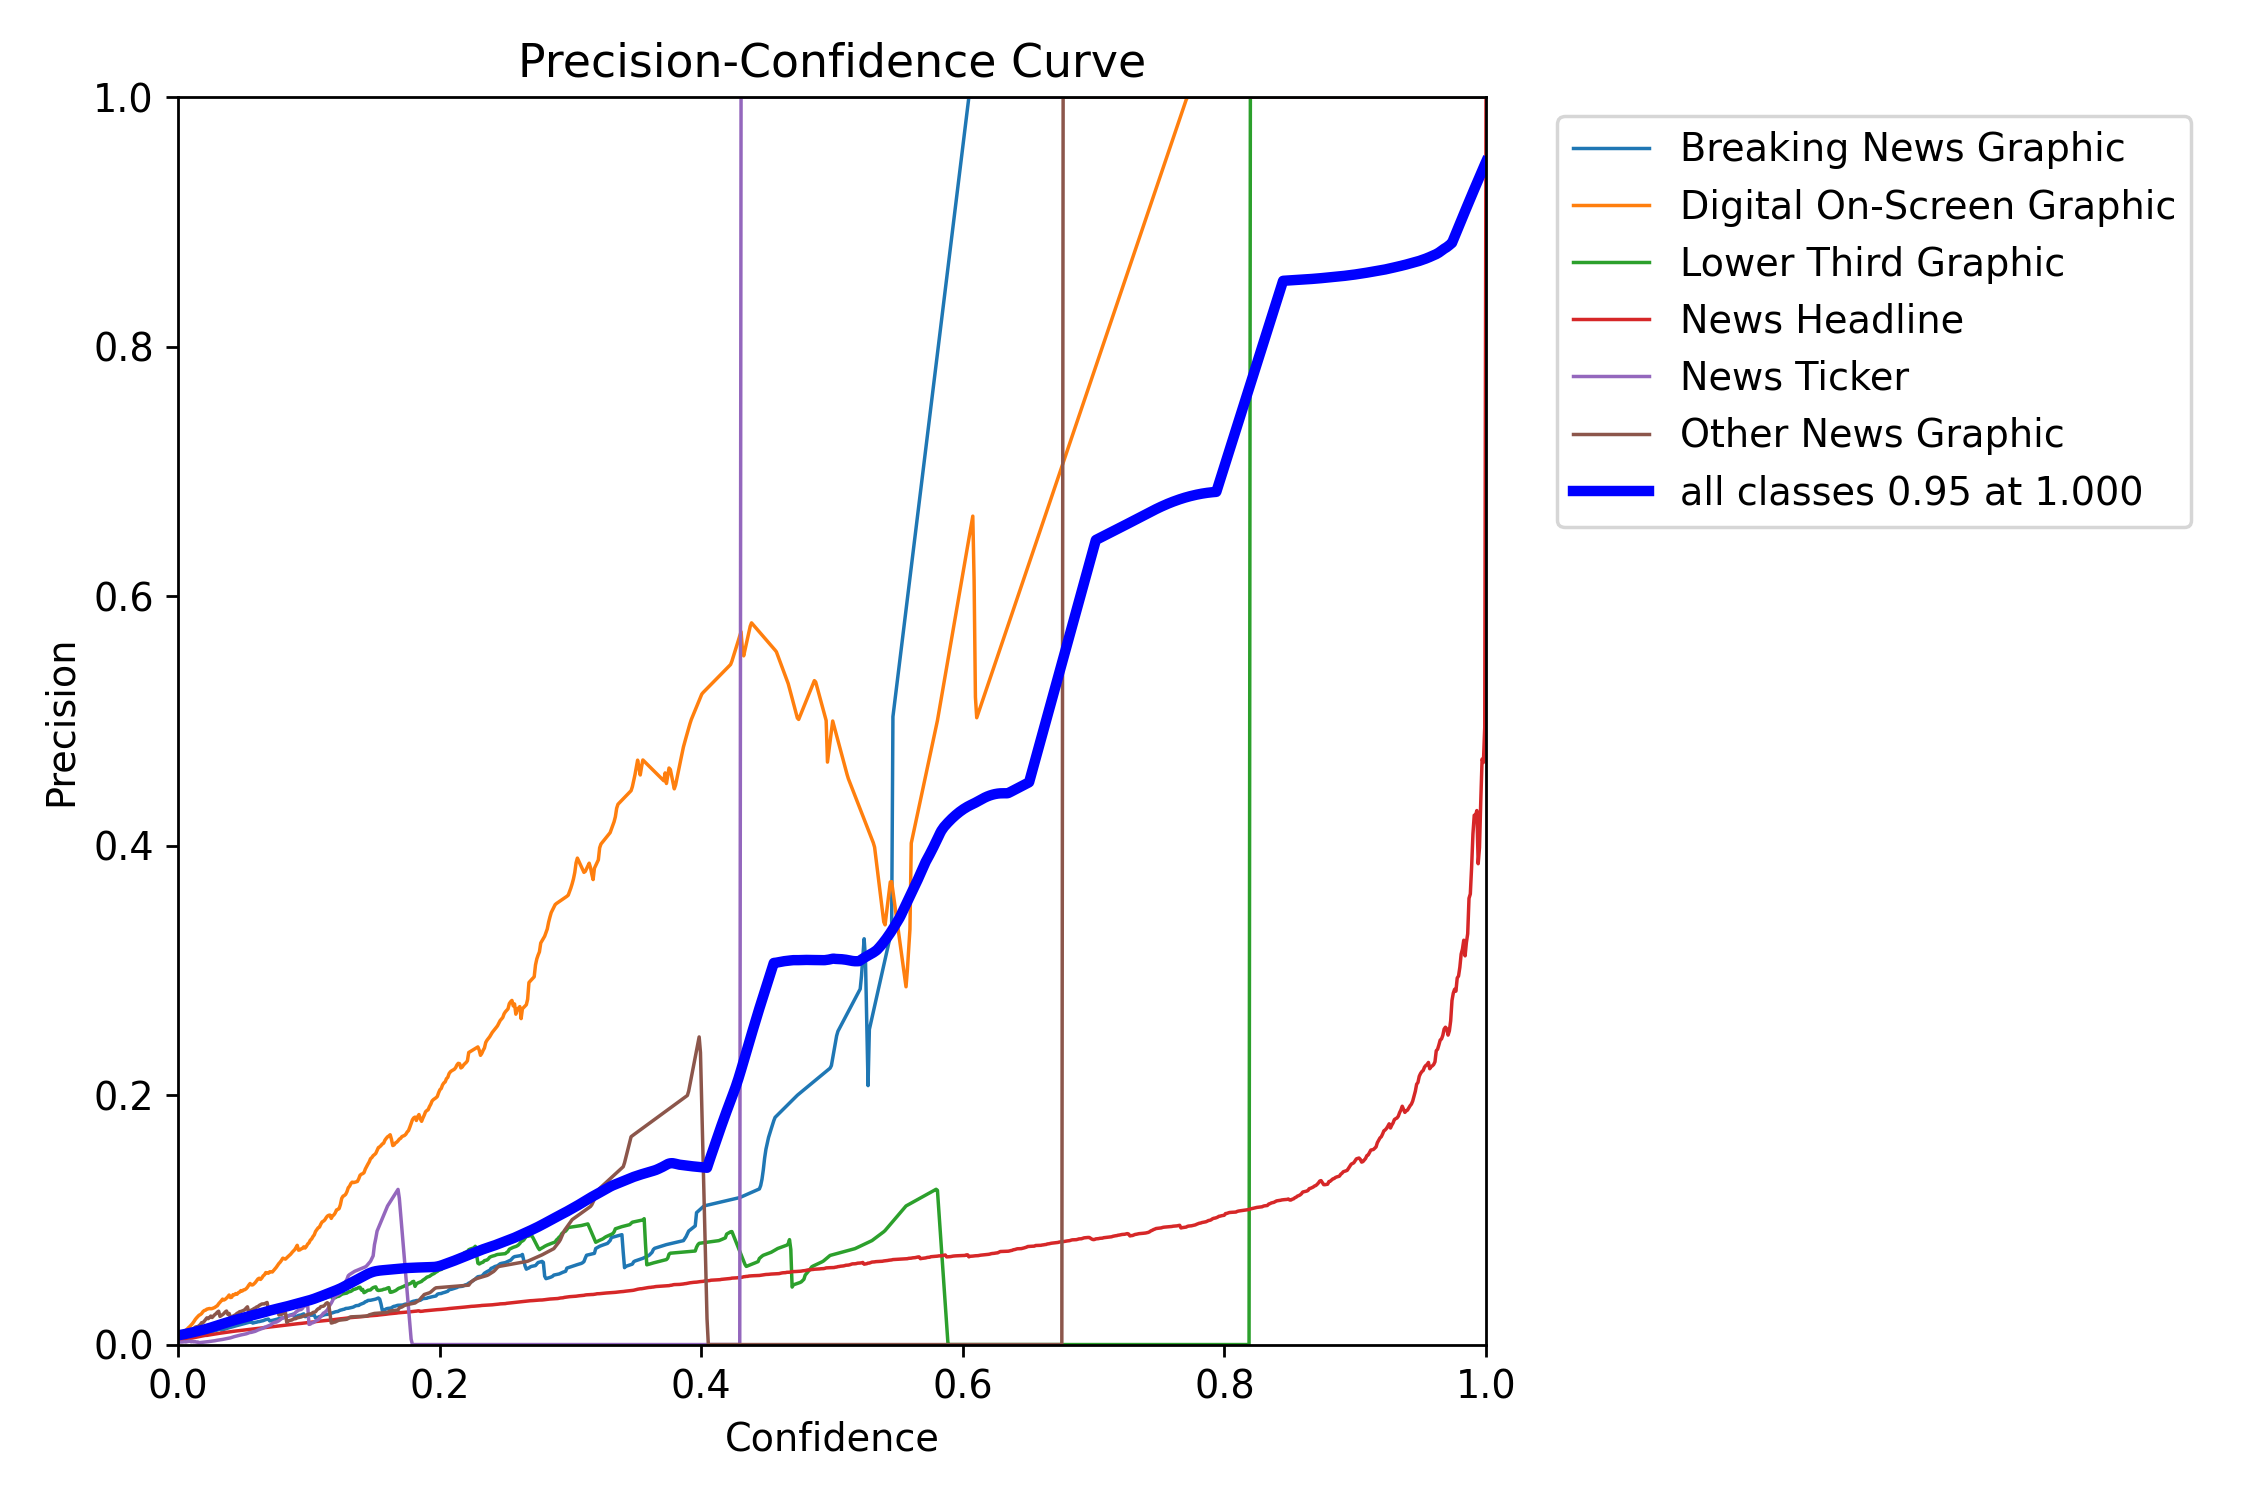

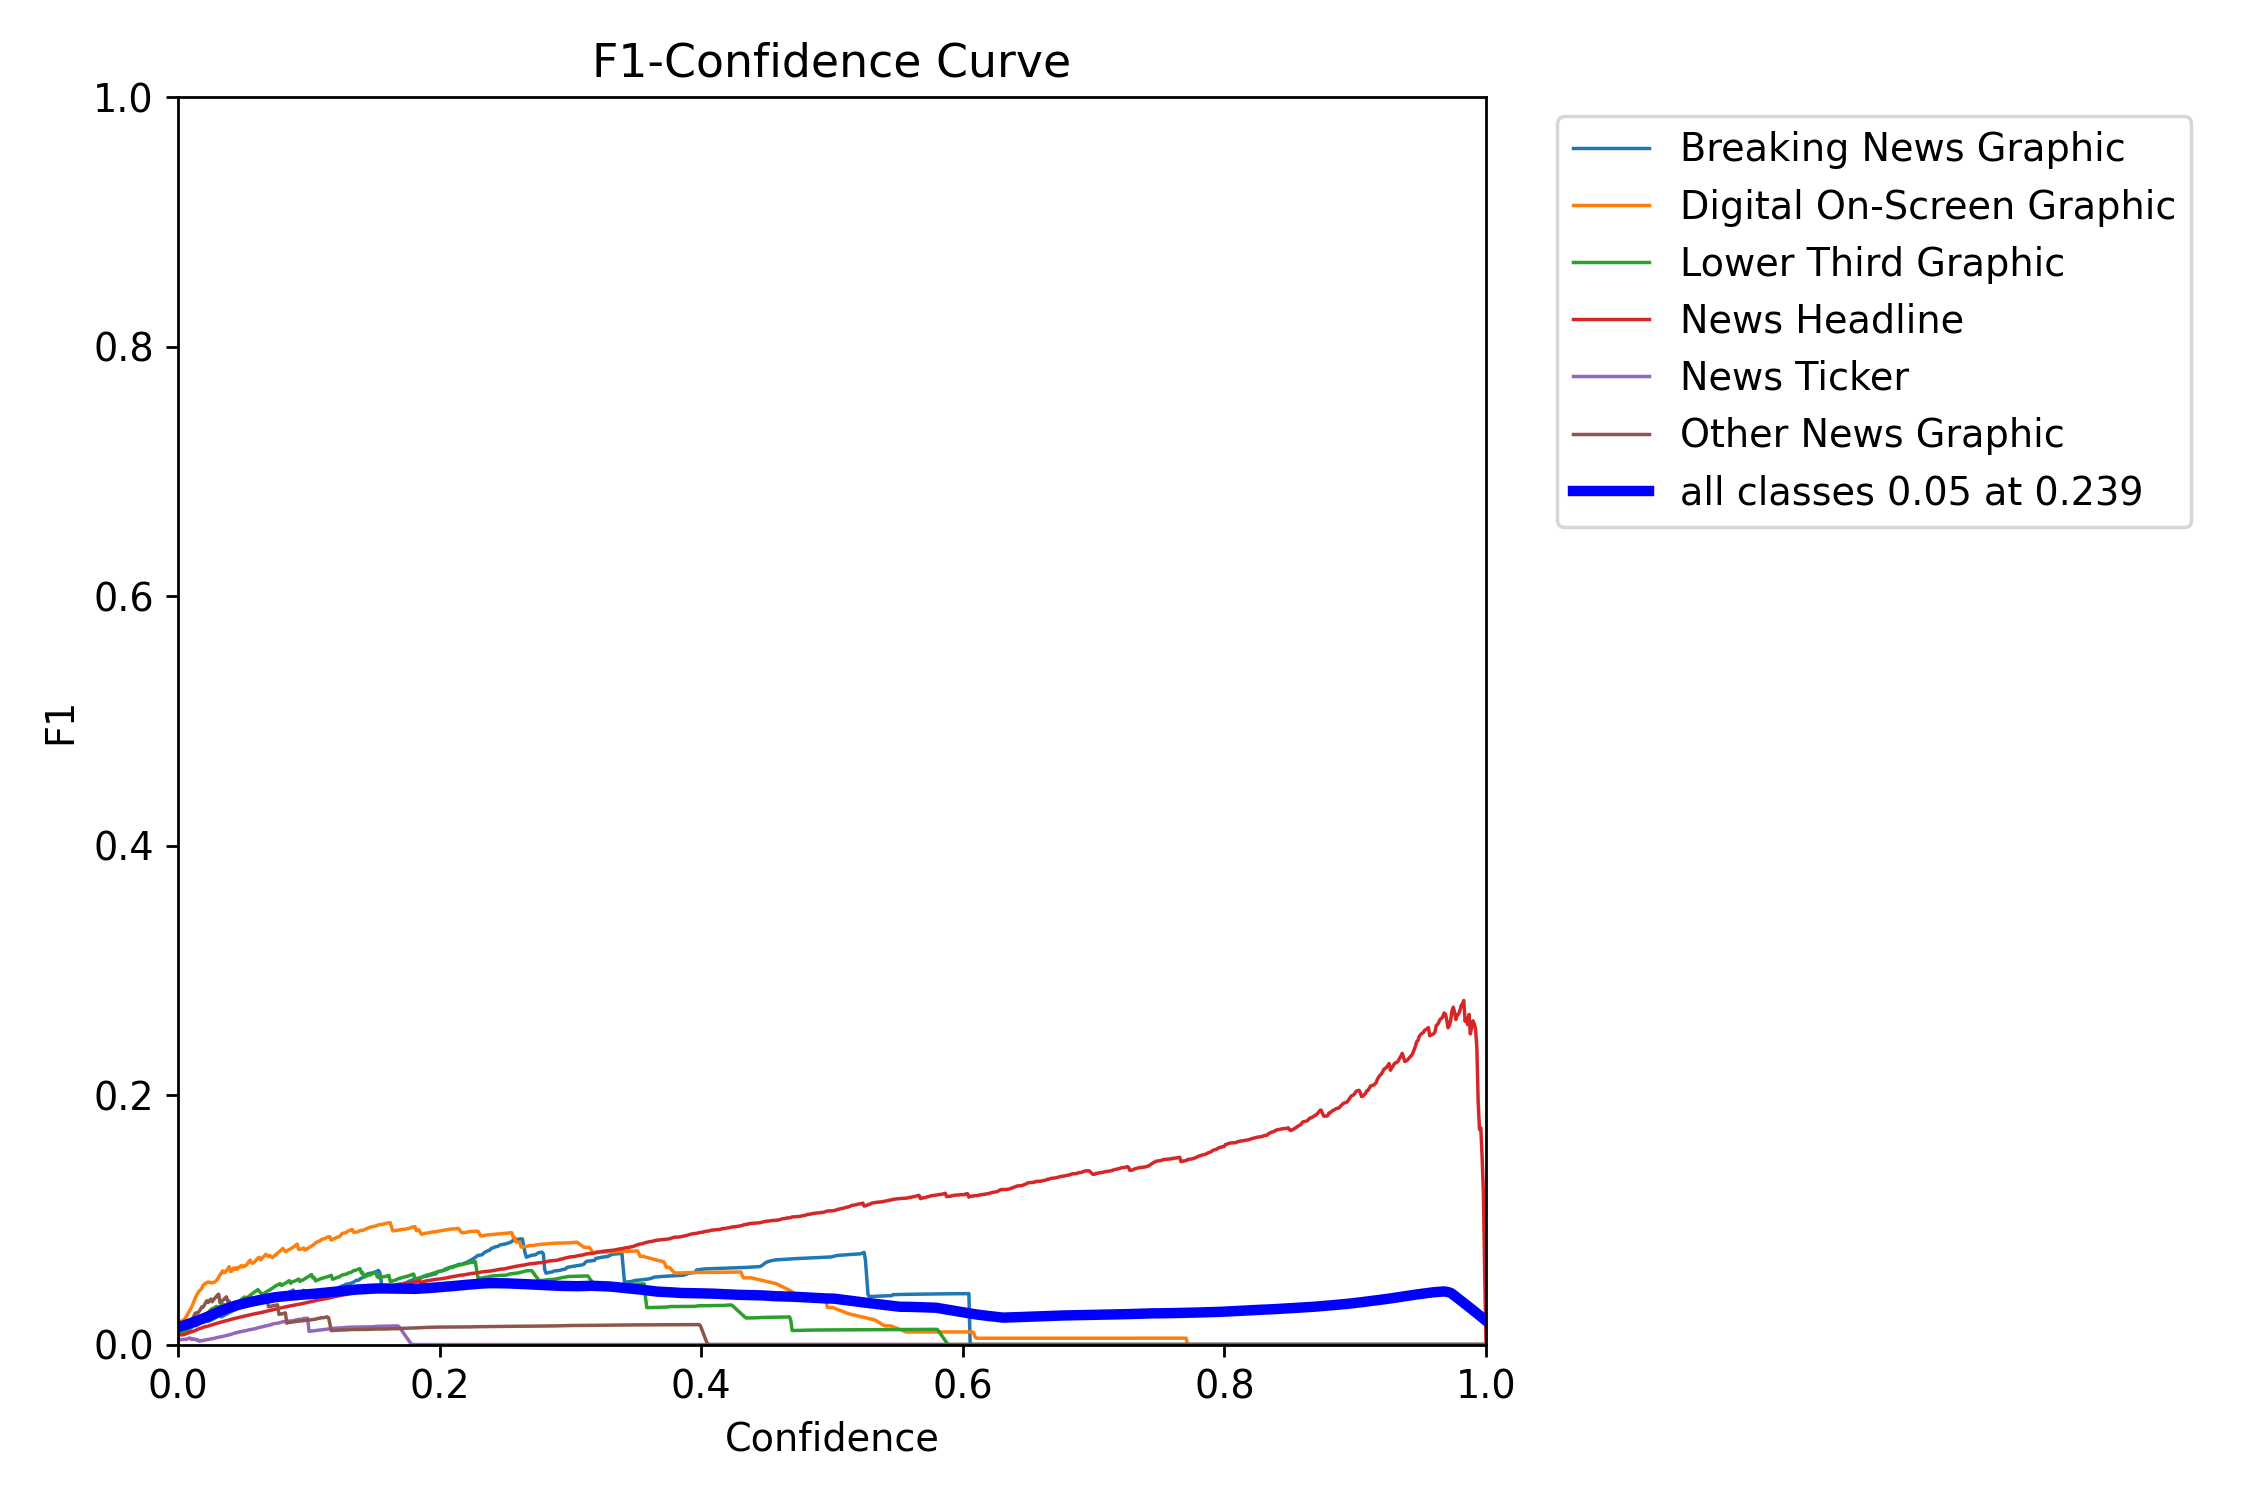

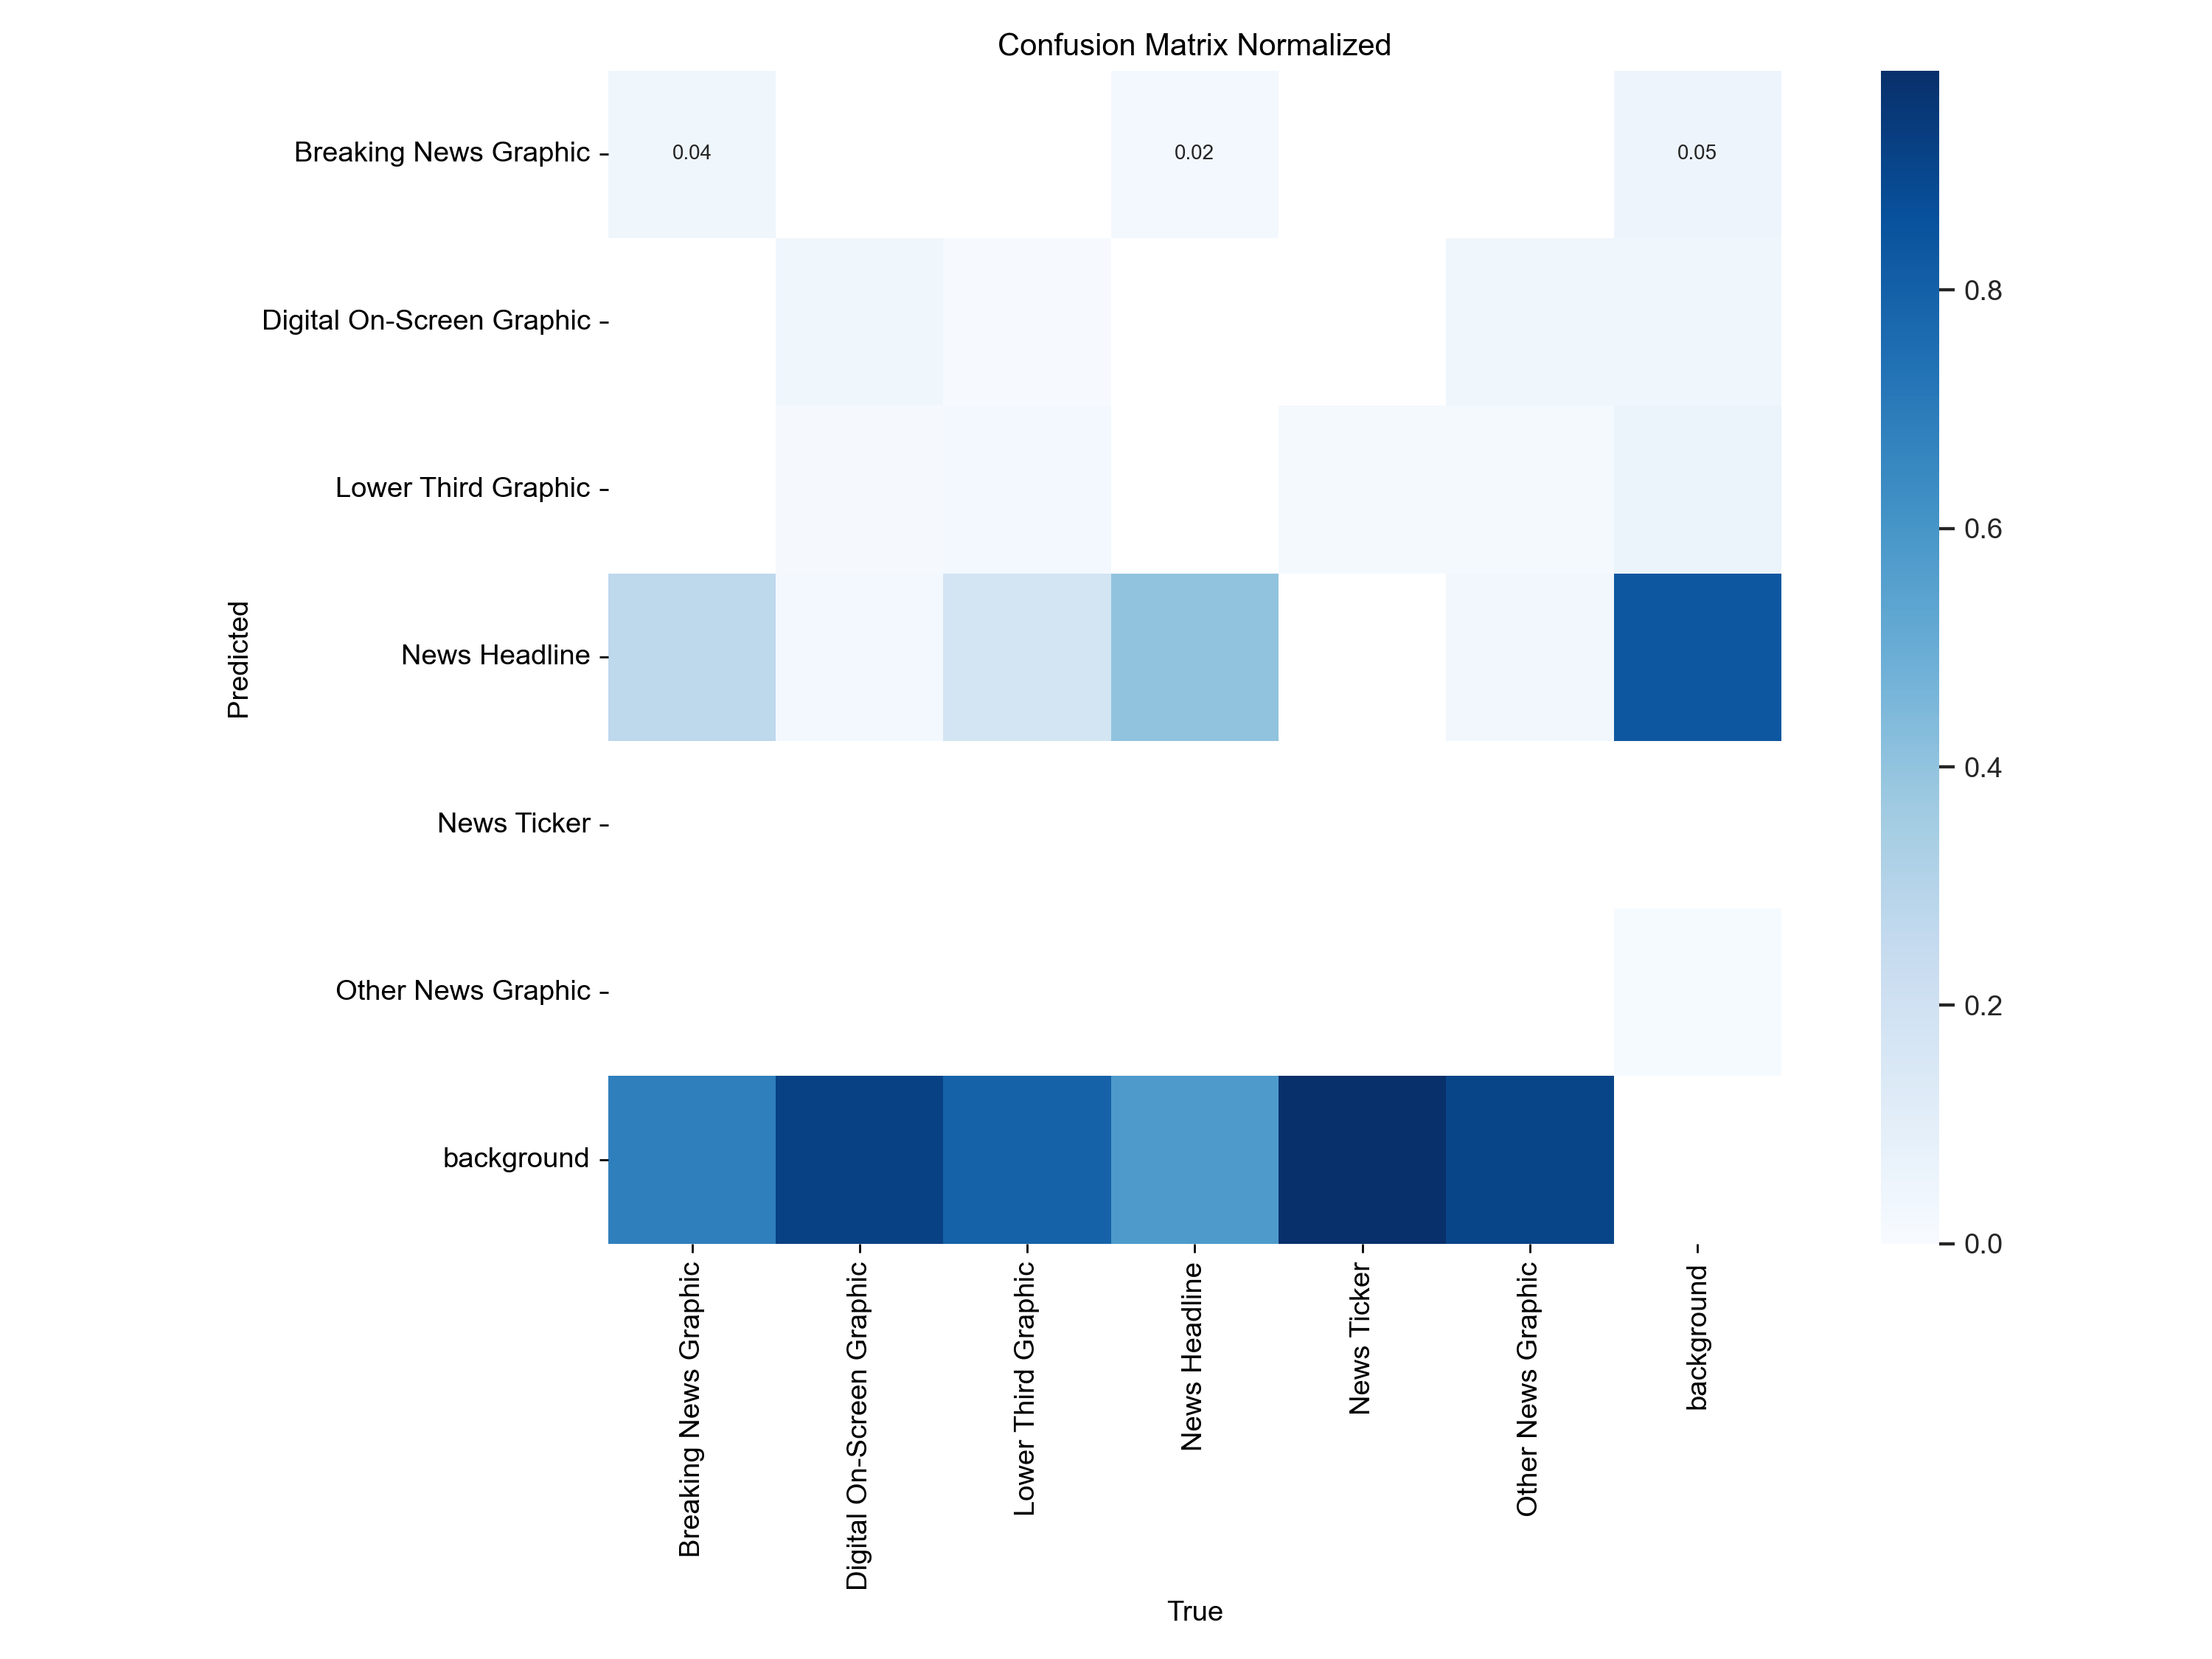

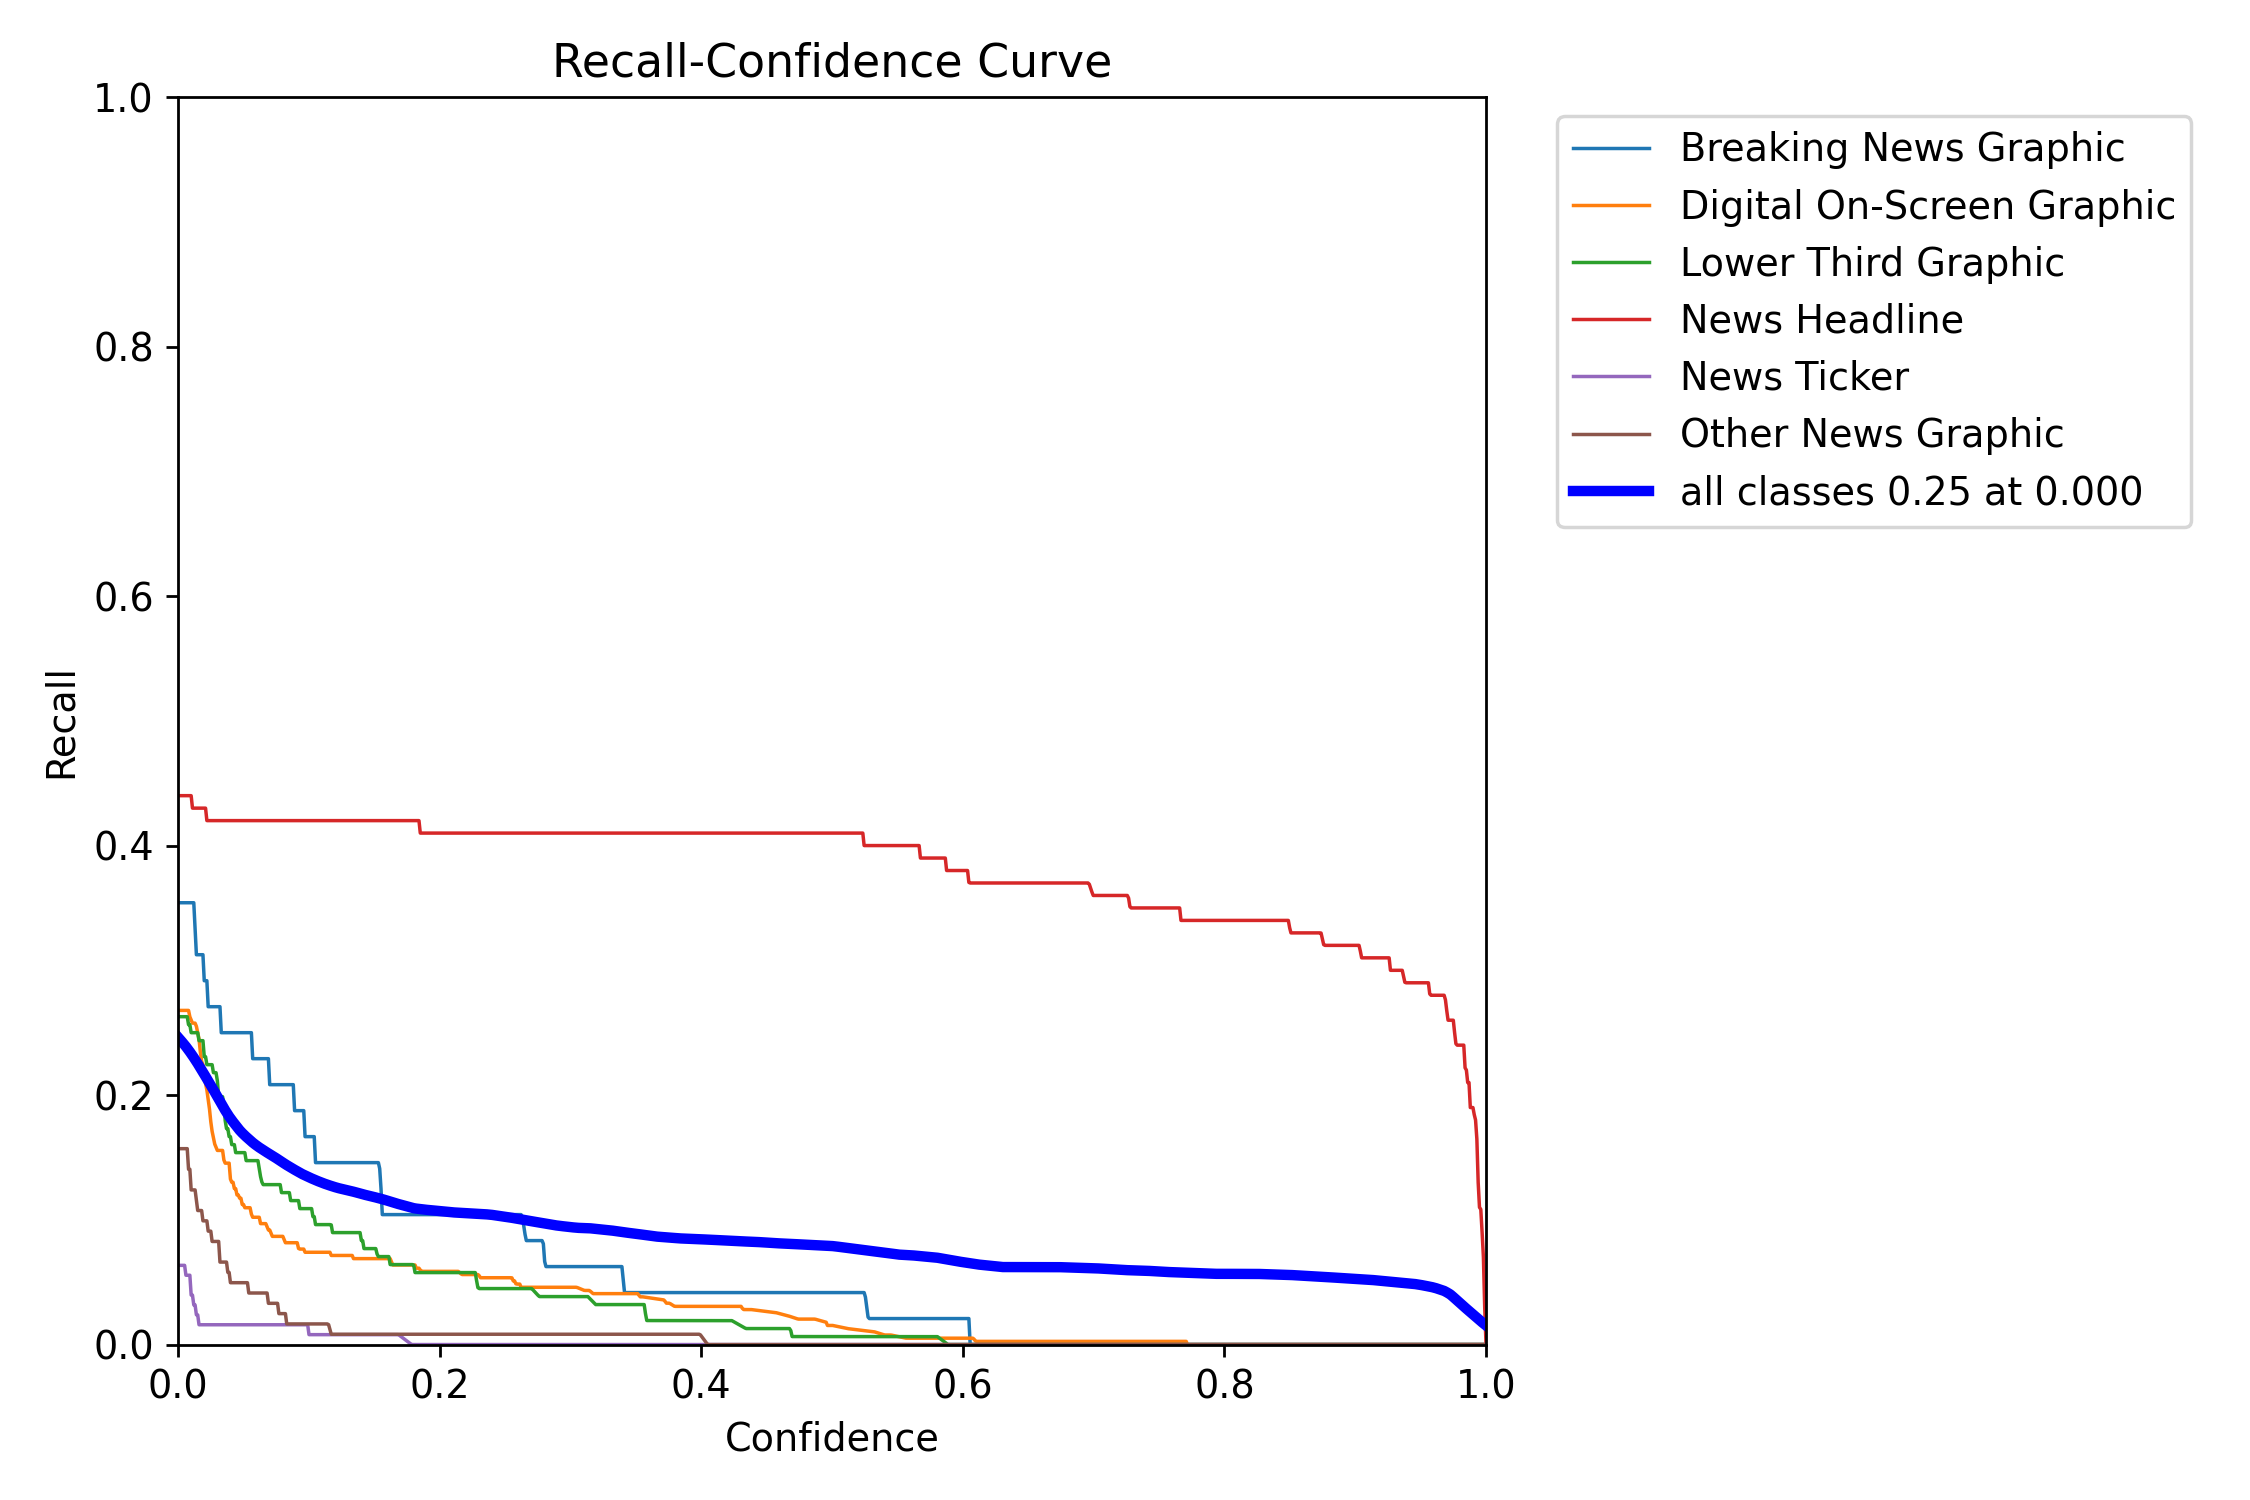

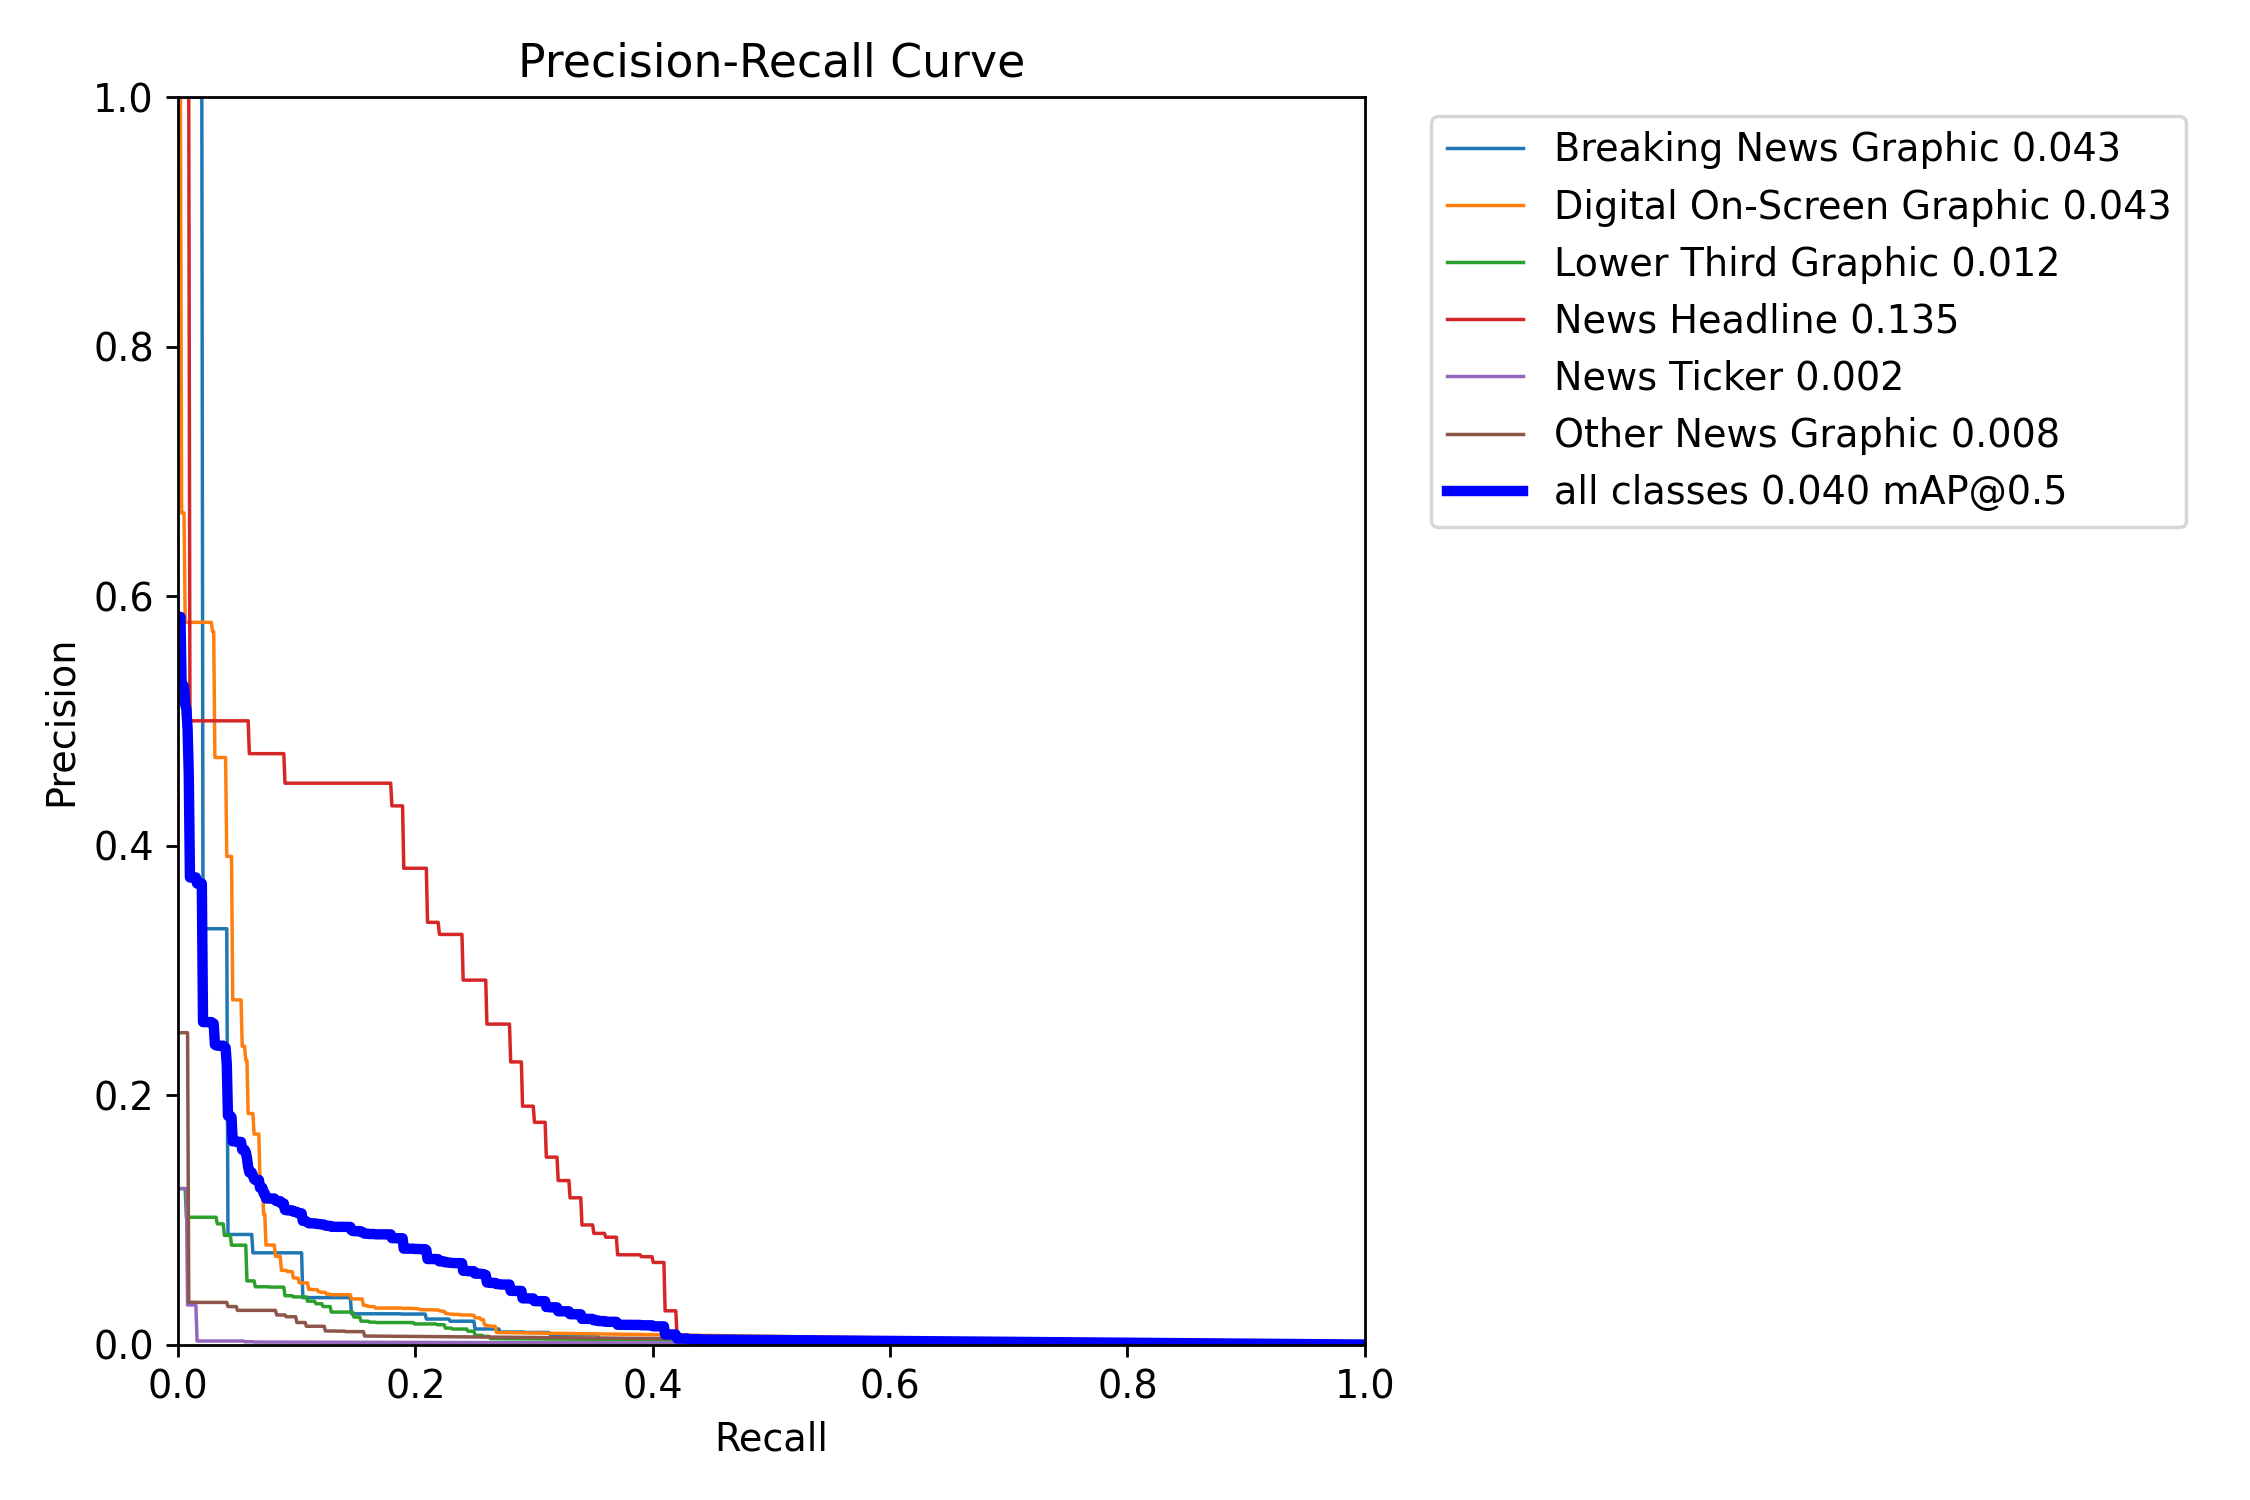

No results.png found in the non-R version of the selected folder.


In [11]:
# Path to the "runs/detect" folder
detect_folder_path = os.path.join(os.getcwd(), "runs", "detect")

# Get all folders ending with "R" and sort them in ascending order
folders_ending_with_R = sorted([
    folder for folder in os.listdir(detect_folder_path)
    if folder.endswith("R") 
    and os.path.isdir(os.path.join(detect_folder_path, folder))
])

# Check if there are any folders to choose from
if not folders_ending_with_R:
    print("No Results folders ending with 'R' found!")
else:
    # Display available folders for user selection
    print("Available folders:")
    for i, folder in enumerate(folders_ending_with_R, start=1):
        print(f"{i}. {folder}")
    
    # Prompt the user to select a folder
    try:
        choice = int(input("Enter the number corresponding to the folder you want to use: ")) - 1
        if choice < 0 or choice >= len(folders_ending_with_R):
            raise IndexError
        selected_folder = folders_ending_with_R[choice]
    except (ValueError, IndexError):
        print("Invalid selection. Please restart and try again.")
        raise
    
    print(f"\nSelected folder: {selected_folder}")
    # Path to the selected folder
    eval_folder_path = os.path.join(detect_folder_path, selected_folder)

    # List of evaluation images excluding "val_batch" files
    evaluation_images = [
        img for img in os.listdir(eval_folder_path)
        if img.lower().endswith(('.png', '.jpg')) and "val_batch" not in img
    ]

    # Display images
    if not evaluation_images:
        print("No evaluation images found in the selected folder.")
    else:
        print("\nDisplaying evaluation images:")
        for img_file in evaluation_images:
            img_path = os.path.join(eval_folder_path, img_file)
            display(Image(filename=img_path))

    # Path to the non-R version of the selected folder
    non_r_folder = selected_folder.rstrip("R")
    non_r_folder_path = os.path.join(detect_folder_path, non_r_folder)

    # Check and display "results.png" if it exists
    results_png_path = os.path.join(non_r_folder_path, "results.png")
    if os.path.exists(results_png_path):
        print("\nDisplaying results.png from the non-R version of the folder:")
        display(Image(filename=results_png_path))
    else:
        print("No results.png found in the non-R version of the selected folder.")